# Trabajando con archivos .laz (LiDAR)

In [1]:
# Upload files
from google.colab import files
uploaded = files.upload()

Saving PNOA_2015_VAL_726-4392_ORT-CLA-RGB.laz to PNOA_2015_VAL_726-4392_ORT-CLA-RGB.laz


In [2]:
#Instalación de librerías
!pip install pylas
!pip install lazrs

  Created wheel for pylas: filename=pylas-0.4.3-cp36-none-any.whl size=40352 sha256=3d63de6c14db56ed242694b4a2ae348494c7a2ba60bf84890dc552c1c9fb1aad
  Stored in directory: /root/.cache/pip/wheels/37/78/47/ddd1d3d557df40822faf96994f5489659053d7c1aad6620672
Successfully built pylas
     |████████████████████████████████| 1.1MB 3.2MB/s 


In [92]:
#Importación de librerías
import numpy as np
import pandas as pd
import pylas
import matplotlib.pyplot as plt

In [93]:
with pylas.open('/content/PNOA_2015_VAL_726-4392_ORT-CLA-RGB.laz') as fh:
    print('Points from Header:', fh.header.point_count)
    las = fh.read()
    print(las)
    print('Points from data:', len(las.points))
    ground_pts = las.classification == 2
    bins, counts = np.unique(las.return_number[ground_pts], return_counts=True)
    print('Ground Point Return Number distribution:')
    for r,c in zip(bins,counts):
        print('    {}:{}'.format(r,c))

Points from Header: 5017579
<LasData(1.2, point fmt: <PointFormat(3)>, 5017579 points, 0 vlrs)>
Points from data: 5017579
Ground Point Return Number distribution:
    1:1582522
    2:444354
    3:129927
    4:24866
    5:3108


In [94]:
puntos = las.points.tolist()

In [95]:
columns = ['X', 'Y', 'Z', 'intensity', 'bit_fields', 'raw_classification', 'scan_angle_rank', 'user_data', 'point_source_id', 'gps_time',' red', 'green', 'blue']

In [96]:
data = pd.DataFrame(puntos, columns = columns)
data.head()

,X,Y,Z,intensity,bit_fields,raw_classification,scan_angle_rank,user_data,point_source_id,gps_time,red,green,blue
0,72600154,439000016,11494,186,9,2,11,2,204,380691.995571,22016,19968,19968
1,72600088,439000108,11498,185,9,2,11,2,204,380691.995567,20736,19200,19968
2,72600027,439000192,11499,213,9,2,11,2,204,380691.995563,18944,17920,18176
3,72600302,439000051,11487,186,9,2,11,2,204,380691.979341,17920,16384,17920
4,72600240,439000137,11487,201,9,2,11,2,204,380691.979337,19200,17920,18688


In [97]:
data.raw_classification.unique()

array([ 2,  3,  4,  1,  5,  7,  6, 12])

In [98]:
las_classification = {
    '0': 'Nunca clasificado',
    '1': 'No asignado',
    '2': 'Terreno',
    '3': 'Vegetación baja',
    '4': 'Vegetación media',
    '5': 'Vegetación alta',
    '6': 'Edificio',
    '7': 'Punto bajo',
    '8': 'Reservado',
    '9': 'Agua',
    '10': 'Ferrocarril',
    '11': 'Carretera',
    '12': 'Reservado',
}

In [99]:
data.shape

(5017579, 13)

In [100]:
data.groupby('raw_classification').X.count()

raw_classification
1       52036
2     2184777
3      562906
4      815519
5      559126
6       79602
7        2458
12     761155
Name: X, dtype: int64

In [101]:
terrain_data = data[data['raw_classification'] == 2]
terrain_data.head()

,X,Y,Z,intensity,bit_fields,raw_classification,scan_angle_rank,user_data,point_source_id,gps_time,red,green,blue
0,72600154,439000016,11494,186,9,2,11,2,204,380691.995571,22016,19968,19968
1,72600088,439000108,11498,185,9,2,11,2,204,380691.995567,20736,19200,19968
2,72600027,439000192,11499,213,9,2,11,2,204,380691.995563,18944,17920,18176
3,72600302,439000051,11487,186,9,2,11,2,204,380691.979341,17920,16384,17920
4,72600240,439000137,11487,201,9,2,11,2,204,380691.979337,19200,17920,18688


In [102]:
low_vegetation_data = data[data['raw_classification'] == 3]
low_vegetation_data.size

7317778

In [103]:
data_merged = pd.merge(on = ['X', 'Y'], how = 'inner', left = terrain_data, right = low_vegetation_data)
data_merged.head()

,X,Y,Z_x,intensity_x,bit_fields_x,raw_classification_x,scan_angle_rank_x,user_data_x,point_source_id_x,gps_time_x,red_x,green_x,blue_x,Z_y,intensity_y,bit_fields_y,raw_classification_y,scan_angle_rank_y,user_data_y,point_source_id_y,gps_time_y,red_y,green_y,blue_y
0,72678130,439001312,11083,86,18,2,0,2,204,380682.906335,2560,3584,8192,11134,84,17,3,0,2,204,380682.906335,2560,3584,8192
1,72682292,439004296,11549,43,18,2,0,2,204,380682.192049,21760,19200,18176,11573,55,17,3,0,2,204,380682.192049,21760,19200,18176
2,72681696,439004726,11542,118,18,2,0,2,204,380682.224489,4352,5632,9984,11622,23,17,3,0,2,204,380682.224489,4352,5632,9984
3,72683864,439003743,11795,59,18,2,0,2,204,380682.062222,40448,36352,33536,11824,71,17,3,0,2,204,380682.062222,40448,36352,33536
4,72684344,439004447,11983,118,18,2,0,2,204,380681.948561,5888,6144,10496,12057,28,17,3,0,2,204,380681.948561,3328,4096,9216


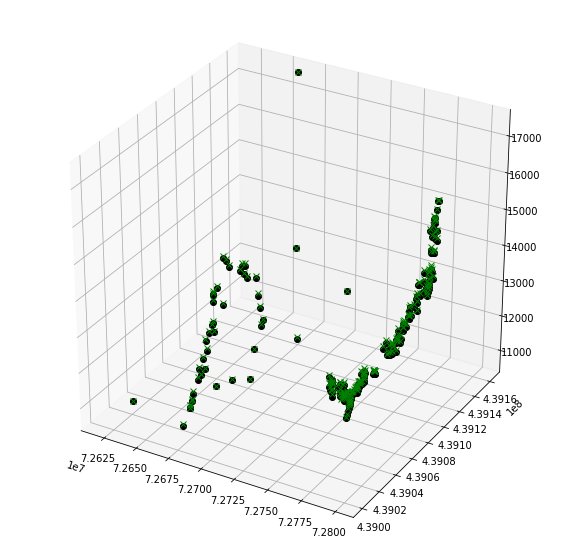

In [104]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
plt.plot(data_merged['X'], data_merged['Y'], data_merged['Z_x'], 'ok')
plt.plot(data_merged['X'], data_merged['Y'], data_merged['Z_y'], 'xg')

In [105]:
medium_vegetation_data = data[data['raw_classification'] == 4]
medium_vegetation_data.size

10601747

In [106]:
data_merged = pd.merge(on = ['X', 'Y'], how = 'inner', left = terrain_data, right = medium_vegetation_data)
data_merged.head()

,X,Y,Z_x,intensity_x,bit_fields_x,raw_classification_x,scan_angle_rank_x,user_data_x,point_source_id_x,gps_time_x,red_x,green_x,blue_x,Z_y,intensity_y,bit_fields_y,raw_classification_y,scan_angle_rank_y,user_data_y,point_source_id_y,gps_time_y,red_y,green_y,blue_y
0,72752986,439065643,11386,90,18,2,0,2,204,380669.788748,32512,23296,21504,11520,128,17,4,0,2,204,380669.788748,32512,23296,21504
1,72759034,439070951,10984,136,18,2,0,2,204,380668.765905,36864,28416,25856,11107,27,17,4,0,2,204,380668.765905,28416,21504,20992
2,72758588,439071321,11031,81,27,2,0,2,204,380668.782120,53248,45312,38912,11144,25,25,4,0,2,204,380668.782120,53248,45312,38912
3,72758998,439071375,11028,33,18,2,0,2,204,380668.733419,38656,30976,28416,11180,134,17,4,0,2,204,380668.733419,35328,27648,26624
4,72758434,439072041,11032,116,18,2,0,2,204,380668.749621,47872,39936,35072,11158,25,17,4,0,2,204,380668.749621,46080,37632,33280


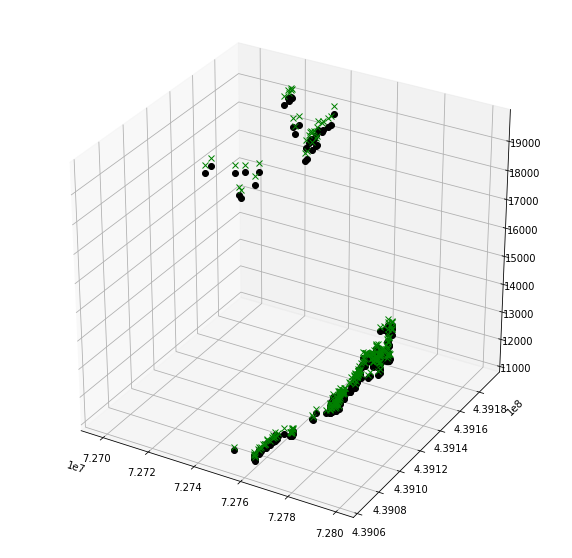

In [107]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
plt.plot(data_merged['X'], data_merged['Y'], data_merged['Z_x'], 'ok')
plt.plot(data_merged['X'], data_merged['Y'], data_merged['Z_y'], 'xg')

In [108]:
high_vegetation_data = data[data['raw_classification'] == 5]
high_vegetation_data.size

7268638

In [109]:
data_merged = pd.merge(on = ['X', 'Y'], how = 'inner', left = terrain_data, right = high_vegetation_data)
data_merged.head()

,X,Y,Z_x,intensity_x,bit_fields_x,raw_classification_x,scan_angle_rank_x,user_data_x,point_source_id_x,gps_time_x,red_x,green_x,blue_x,Z_y,intensity_y,bit_fields_y,raw_classification_y,scan_angle_rank_y,user_data_y,point_source_id_y,gps_time_y,red_y,green_y,blue_y
0,72797071,439012842,8697,118,27,2,-15,2,204,380669.109544,22784,24576,17664,9120,63,25,5,-15,2,204,380669.109548,19712,22272,16640
1,72796874,439016044,8923,83,27,2,-14,2,204,380668.882133,7936,10240,9728,9378,7,26,5,-14,2,204,380668.882138,11264,12544,11776
2,72798648,439076390,11907,268,18,2,-5,2,204,380664.042403,14592,15616,12288,13078,18,25,5,-5,2,204,380664.042407,10240,10496,11008
3,72782226,439091613,12622,17,18,2,0,2,204,380664.658446,3072,4864,10752,13162,123,17,5,0,2,204,380664.658446,2560,4864,11264
4,72782340,439091639,12628,12,18,2,0,2,204,380664.642211,4864,5632,9472,13164,104,17,5,0,2,204,380664.642211,24320,22016,19968


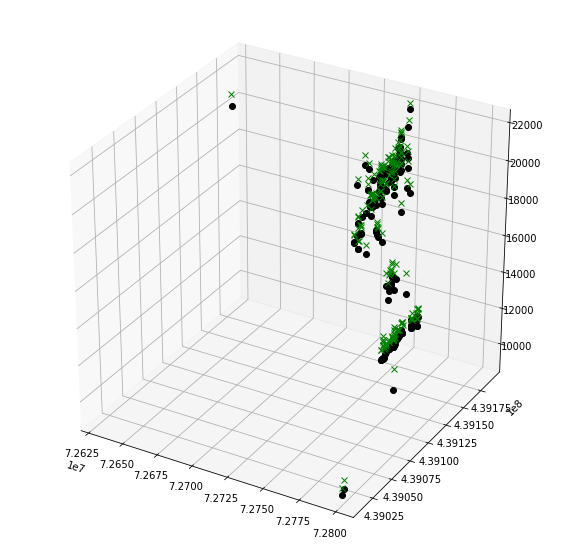

In [110]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
plt.plot(data_merged['X'], data_merged['Y'], data_merged['Z_x'], 'ok')
plt.plot(data_merged['X'], data_merged['Y'], data_merged['Z_y'], 'xg')